# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [197]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [198]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?. Poner en dos lineas de texto. Correlaciones.

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

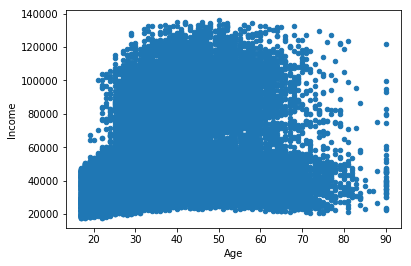

In [199]:
income.plot(x='Age', y='Income', kind='scatter')

# Cual es la relación entre edad e ingreso?

La relación enntre edad e ingreso es que las personas con mayores ingresos se encuentran en las edades de mayor productividad, entre los 25 y 65 años.

# For a one percent increase in the Age how much the income increases?

# Usando descenso de Gradiente

Text(0,0.5,'Income')

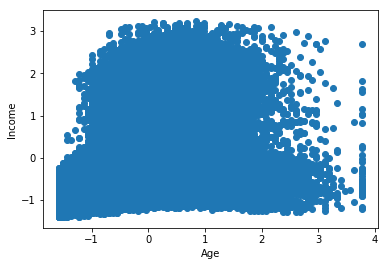

In [200]:
#Normalizando la información
X=income['Age']
y=income['Income']
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Income')

In [162]:
beta_ini=[-1,1]

In [201]:
# create X and y
obs = X.shape[0]
Model = np.c_[np.ones(obs), X]

In [202]:
# h
def lr_h(beta,x):
    return np.dot(beta, x.T)

In [203]:
# Cost function
def lr_cost_func(beta, x, y):
    # Can be vectorized
    res = 0
    for i in range(x.shape[0]):
        res += (lr_h(beta,x[i, :]) - y[i]) ** 2
    res *= 1 / (2*x.shape[0])
    return res
lr_cost_func(beta_ini, X_, y)

0.4584205830130519

In [166]:
beta0 = np.arange(-5, 5, 1)
beta1 = np.arange(-5, 5, 1)

In [204]:
# gradient calculation
beta_ini = np.array([-1.5, 0.])

def gradient(beta, x, y):
    # Not vectorized
    gradient_0  = 1 / x.shape[0] * ((lr_h(beta, x) - y).sum())
    gradient_1  = 1 / x.shape[0] * ((lr_h(beta, x) - y)* x[:, 1]).sum()

    return np.array([gradient_0, gradient_1])

gradient(beta_ini, Model, y)

array([-1.5       , -0.29039938])

In [205]:
#Algoritmo de gradiente
#btas[]iter_,:-1] beta anterior
def gradient_descent(x, y, beta_ini, alpha, iters): 
    betas = np.zeros((iters, beta_ini.shape[0] + 1))

    beta = beta_ini
    for iter_ in range(iters):

        betas[iter_, :-1] = beta
        betas[iter_, -1] = lr_cost_func(beta, x, y)
        beta -= alpha * gradient(beta, x, y)
        
    return betas

In [206]:
iters = 100
alpha = 0.05
beta_ini = np.array([-4., -4.])

betas =  gradient_descent(Model, y, beta_ini, alpha, iters)

Text(0,0.5,'J(beta)')

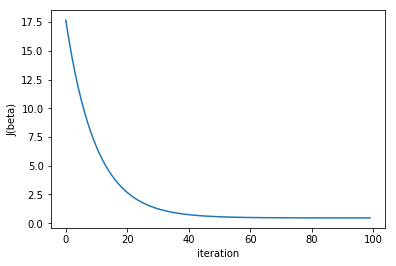

In [207]:
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)')



Linear Regression with betas  [-0.03955346  0.247977  ]


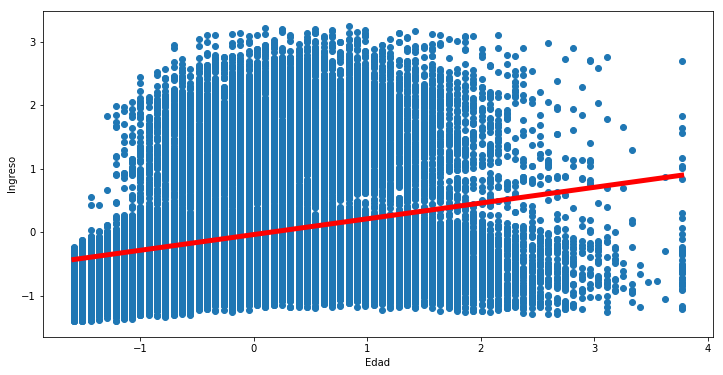

In [208]:
betas_ = betas[range(0, iters, 10), :-1]
for i, beta in enumerate(betas_):
        # scatter plot
    
    # Plot the linear regression
    x = np.c_[np.ones(2), [X.min(), X.max()]]

print('\n\nLinear Regression with betas ', beta)
f, (ax) = plt.subplots(1, figsize=(12, 6))
ax.scatter(X, y)    
ax.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso')
plt.show()

Por un cambio en la edad, el ingreso varia en 0,2479

# Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

In [209]:
from sklearn.linear_model import LinearRegression

MD = LinearRegression()

In [210]:
MD.fit(income[['Age']], income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [211]:
PD = [[30],[40]]
MD.predict(PD)


array([48803.11784304, 54224.79441376])

# Exercise 4.2
Evaluate the model using the MSE

In [212]:
beta = np.dot(np.linalg.inv(np.dot(Model.T, X_)),np.dot(Model.T, y))
print(beta)

[8.62095616e-17 2.90408298e-01]



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [213]:
income['AgeX2'] = income['Age'] ** 2
X1=income['Age']
X2=income['AgeX2']
md = np.c_[np.ones(obs), X1,X2]
rlin = LinearRegression(fit_intercept=False)
rlin.fit(md, y)
rlin.coef_

array([-2.73628229e+00,  1.22980754e-01, -1.19940209e-03])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [214]:
# Usando sklearn
GN = {"Sex":     {"Female": 0, "Male": 1}}
income.replace(GN, inplace=True)
X1=income['Age']
X2=income['Sex']
X3=income['Hours per week']

#Normalizando la información

y=income['Income']
y_mean, y_std = y.mean(), y.std()
X1_mean, X1_std = X1.mean(), X1.std()
X3_mean, X3_std = X3.mean(), X3.std()

y = (y - y_mean)/ y_std
X1 = (X1 - X1_mean)/ X1_std
X3 = (X3 - X3_mean)/ X3_std

obs = X1.shape[0]
md1 = np.c_[np.ones(obs1), X1,X2,X3]




In [215]:
#MD2 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)
MD2=LinearRegression(fit_intercept=False)
MD2.fit(md, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [216]:
print('Regreción lineal con edad ', beta)
print('\n\nRegreción lineal con edad, sexo, horas por semana ', MD2.coef_)

Regreción lineal con edad  [8.62095616e-17 2.90408298e-01]


Regreción lineal con edad, sexo, horas por semana  [-2.73628229e+00  1.22980754e-01 -1.19940209e-03]


In [217]:
PD1 = [[30,1,40],[40,1,40]]
print(MD2.predict(PD1))
print(MD.predict(PD))

[ -82.01346418 -109.37628713]
[48803.11784304 54224.79441376]


# Part 2: Logistic Regression

### Customer Churn:
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [218]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [219]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X. 

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


Text(0,0.5,'Churn?')

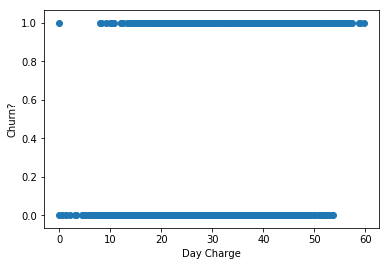

In [264]:
#Explorando la información
# Usando sklearn
#CH = {"Churn?":     {"True.": 1, "False.": 0}}
#data.replace(CH, inplace=True)
plt.scatter(data['Day Charge'], data['Churn?'])
plt.xlabel('Day Charge')
plt.ylabel('Churn?')


In [265]:
# Agrupando 70 - 30
data['Churn_pred'] = np.where(data['Day Charge'] >= 42, 1, 0)
data.head(1000)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Predict,Churn_pred,Churn_Pred_2
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,1,1,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,0,0,0,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,0,0,0,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,0,1,1,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,0,0,0,1
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,118,9.18,6.3,6,1.70,0,0,0,0,1
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,118,9.57,7.5,7,2.03,3,0,0,0,1
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,96,9.53,7.1,6,1.92,0,0,0,0,1
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,90,9.71,8.7,4,2.35,1,0,0,0,1
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,97,14.69,11.2,5,3.02,0,0,1,1,1


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [266]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Day Charge']
X = data[feature_cols]
y = data['Churn_pred']
logreg.fit(X, y)
data['Predict']=logreg.predict(X)

Text(0,0.5,'household')

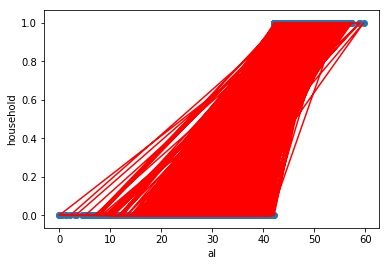

In [268]:
# plot the class predictions
plt.scatter(data['Day Charge'], data['Churn_pred'])
plt.plot(data['Day Charge'], data['Predict'], color='red')
plt.xlabel('al')
plt.ylabel('household')

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [269]:
from sklearn.metrics import confusion_matrix
y_actu = data['Churn?']
y_pred = data['Predict']
confusion_matrix(y_actu, y_pred)

array([[2666,  184],
       [ 321,  162]], dtype=int64)

In [271]:
accuracy = logreg.score(X, y)
print(accuracy)

0.9978997899789979
